# Part 1: MLP on Digits Dataset

In [59]:
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier

In [60]:
data = load_digits()

In [61]:
X = data.data
y = data.target

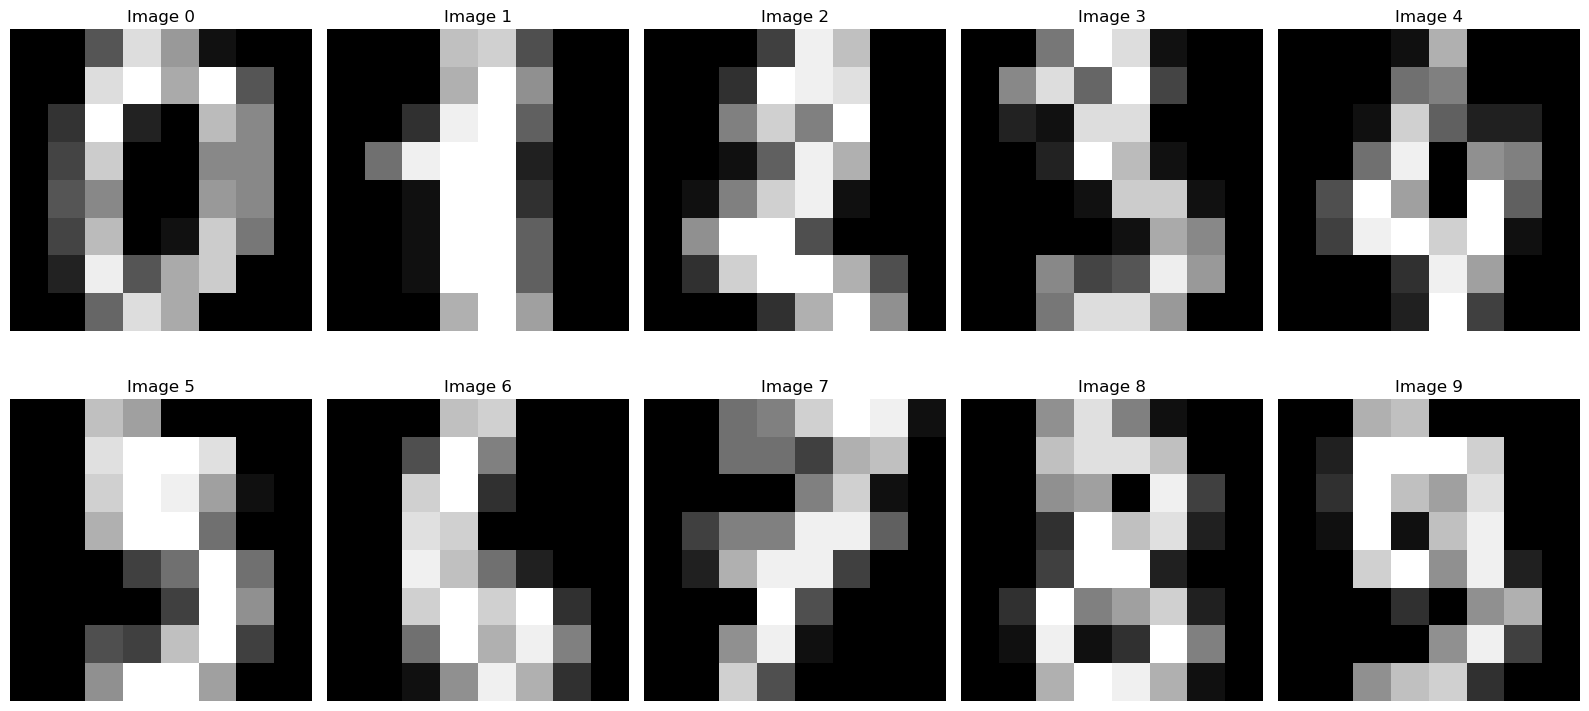

In [62]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(16, 8))

for i in range(10):
    ax = axes[i // 5, i % 5]
    ax.imshow(data.images[i], cmap='gray')
    ax.set_title(f'Image {data.target[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=100)

In [75]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer 

label_binarizer = LabelBinarizer() 
y_train = label_binarizer.fit_transform(y_train) 
y_test = label_binarizer.transform(y_test)

In [76]:
mlp.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=100)

In [77]:
X_train.shape

(1437, 64)

In [78]:
y_train.shape

(1437, 10)

In [79]:
y_pred = mlp.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ValueError: multilabel-indicator is not supported

In [ ]:
print(classification)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      0.98      0.99        46
           5       0.96      0.98      0.97        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.97      0.97      0.97        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



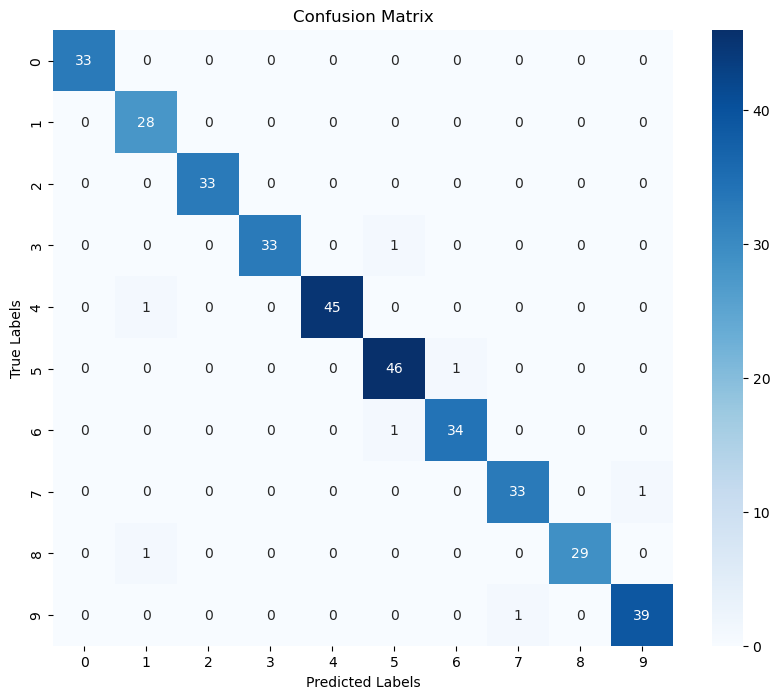

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

In [82]:
X_train.shape

(1437, 64)

In [83]:
y_train.shape

(1437, 10)

In [84]:
import numpy as np 
import tensorflow as tf 
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, LabelBinarizer 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam 
import matplotlib.pyplot as plt

# Data Preprocessing: 
# • Load the Iris dataset using `sklearn.datasets.load_iris()`. 
# • Standardize the data using `StandardScaler`. 
# • Binarize the data. 
label_binarizer = LabelBinarizer() 
y_train = label_binarizer.fit_transform(y_train) 
y_test = label_binarizer.transform(y_test)

# Define the MLP model 
model = Sequential([ 
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),  # First hidden layer 
    Dense(32, activation='relu'),  # Second hidden layer 
    Dense(3, activation='softmax')  # Output layer with 3 classes (Iris Setosa, Versicolor, Virginica) 
]) 

# Compile the model 
model.compile(optimizer=Adam(learning_rate=0.01), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model 
history = model.fit(X_train, y_train, epochs=50, batch_size=8, 
validation_split=0.1, verbose=1)

# Evaluate the model 
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0) 
print(f"Test Accuracy: {test_accuracy:.2f}")

# Plot training and validation accuracy over epochs 
plt.plot(history.history['accuracy'], label='Training Accuracy') 
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend() 
plt.show()


Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 10), output.shape=(None, 3)